In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_parquet(r'C:\Users\migue\Downloads\yellow_tripdata_2019-07.parquet', engine='pyarrow')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2019-07-01 00:51:04,2019-07-01 00:51:33,1.0,0.00,1.0,N,193,193,1,2.50,0.50,0.5,1.14,0.00,0.3,4.94,0.0,None
1,2,2019-07-01 00:46:04,2019-07-01 01:05:46,1.0,4.16,1.0,N,234,25,2,16.50,0.50,0.5,0.00,0.00,0.3,20.30,2.5,None
2,1,2019-07-01 00:25:09,2019-07-01 01:00:56,1.0,18.80,2.0,N,132,42,1,52.00,0.00,0.5,11.75,6.12,0.3,70.67,0.0,None
3,2,2019-07-01 00:33:32,2019-07-01 01:15:27,1.0,18.46,2.0,N,132,142,1,52.00,0.00,0.5,11.06,0.00,0.3,66.36,2.5,None
4,1,2019-07-01 00:00:55,2019-07-01 00:13:05,0.0,1.70,1.0,N,107,114,1,9.50,3.00,0.5,2.00,0.00,0.3,15.30,2.5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310414,2,2019-07-31 23:36:07,2019-08-01 00:03:43,NaN,5.76,NaN,None,249,62,0,32.95,2.75,0.0,0.00,0.00,0.3,36.00,NaN,None
6310415,2,2019-07-31 23:51:30,2019-08-01 00:20:07,NaN,14.40,NaN,None,74,181,0,42.73,2.75,0.0,0.00,6.12,0.3,51.90,NaN,None
6310416,2,2019-07-31 23:13:35,2019-07-31 23:54:20,NaN,7.43,NaN,None,65,76,0,30.99,2.75,0.0,0.00,0.00,0.3,34.04,NaN,None
6310417,2,2019-07-31 23:35:31,2019-08-01 00:00:07,NaN,15.07,NaN,None,119,49,0,50.83,2.75,0.0,0.00,6.12,0.3,60.00,NaN,None


In [67]:
print(f'el total de registros es {df.shape[0]}')
print(f'el promedio de las distancias fue {round(df['trip_distance'].mean(),2)} millas')
print(f'el total dist recorrida fue {round(df['trip_distance'].sum(),2)} millas')
print(f'el promedio de tarifa fue {round(df['total_amount'].mean(),2)} dolares')
print(f'el total income fue {round(df['total_amount'].sum(),2)} dolares')

el total de registros es 6310419
el promedio de las distancias fue 3.11 millas
el total dist recorrida fue 19626235.15 millas
el promedio de tarifa fue 19.61 dolares
el total income fue 123761823.33 dolares


In [68]:
print(f'{df.shape[0]},{round(df['trip_distance'].mean(),2)},{round(df['trip_distance'].sum(),2)},{round(df['total_amount'].mean(),2)},{round(df['total_amount'].sum(),2)}')

6310419,3.11,19626235.15,19.61,123761823.33


## Se crea un archivo Auxiliar.csv que contiene un resumen de los viajes en Taxi Verde y Amarillo en los últimos 6 meses de 2019

In [3]:
df = pd.read_csv(r'C:\Users\migue\OneDrive\Escritorio\Dataset Taxis\data_limpia\auxiliar.csv')
df

,año,mes,taxi,viajes_totales,distancia_prom,distancia_total,tarifa_prom,tarifa_total
0,2019,12,green,455294,3.48,1583299.00,18.77,8.547590e+06
1,2019,11,green,449500,2.89,1300109.95,18.71,8.409174e+06
2,2019,10,green,476386,3.54,1688128.25,18.99,9.044708e+06
3,2019,9,green,449063,3.52,1580697.81,18.62,8.363624e+06
4,2019,8,green,449695,3.48,1566423.54,18.18,8.177106e+06
5,2019,7,green,470743,3.32,1563070.18,17.42,8.199141e+06
6,2019,12,yellow,6896317,2.97,20505652.88,19.64,1.354550e+08
7,2019,11,yellow,6878111,2.93,20144796.55,19.41,1.334860e+08
8,2019,10,yellow,7213891,3.02,21762326.02,19.75,1.424879e+08
9,2019,9,yellow,6567788,3.09,20274590.81,19.92,1.308197e+08


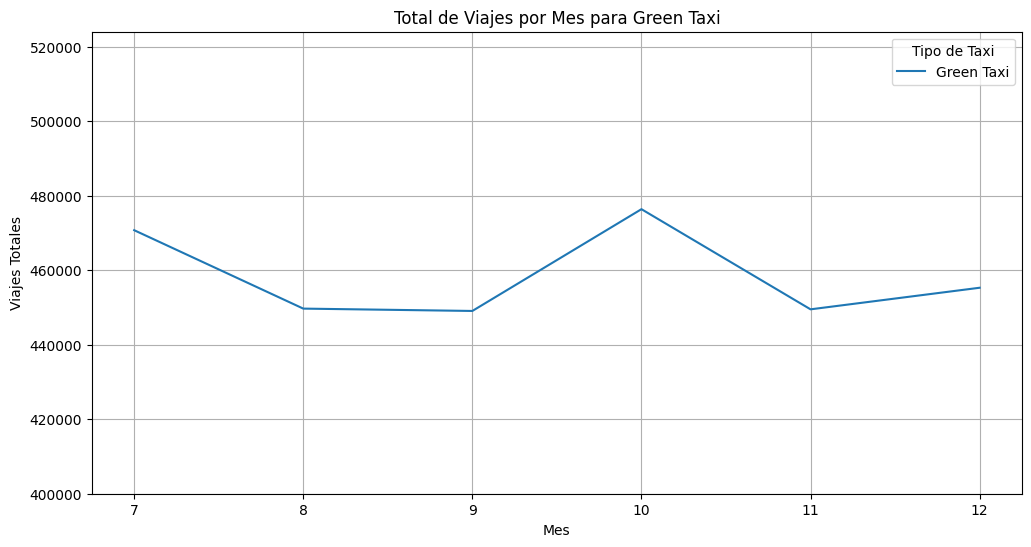

In [22]:
df_green = df[df['taxi'] == 'green']

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar los datos para taxis verdes
sns.lineplot(data=df_green, x='mes', y='viajes_totales', label='Green Taxi')


# Personalizar el gráfico
plt.title('Total de Viajes por Mes para Green Taxi')
plt.xlabel('Mes')
plt.ylabel('Viajes Totales')
plt.legend(title='Tipo de Taxi')
plt.grid(True)
plt.ylim(400000,df_green['viajes_totales'].max() *1.1)

# Mostrar el gráfico
plt.show()

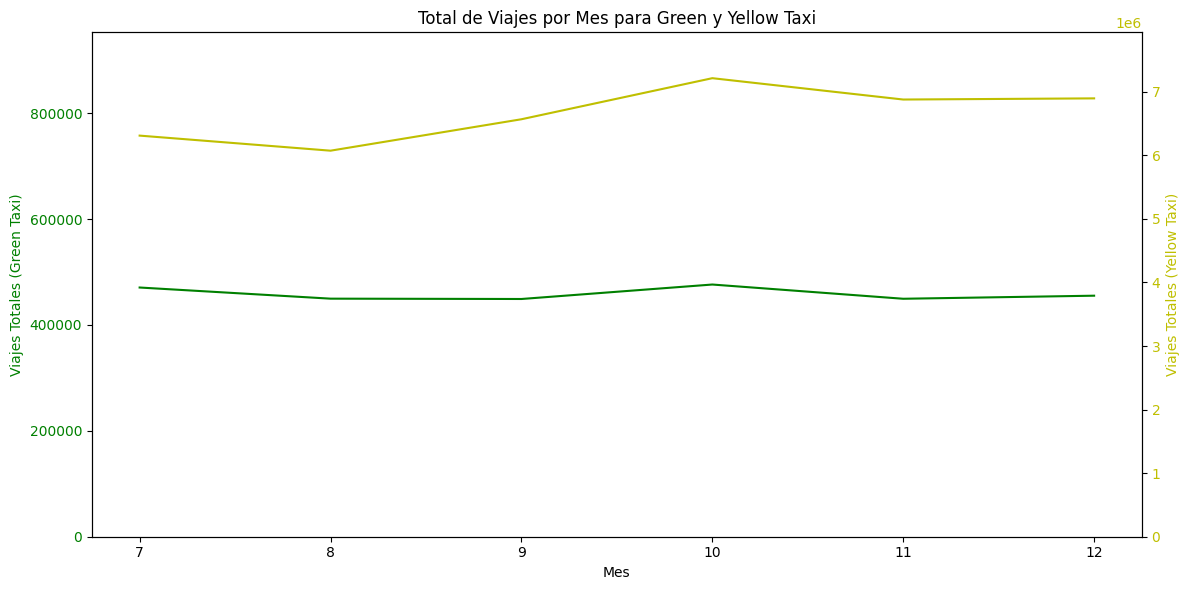

In [15]:

# Filtrar datos por tipo de taxi
df_green = df[df['taxi'] == 'green']
df_yellow = df[df['taxi'] == 'yellow']

# Crear la figura y el primer eje
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar los datos para taxis verdes en el primer eje
ax1.plot(df_green['mes'], df_green['viajes_totales'], color='g', label='Green Taxi')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Viajes Totales (Green Taxi)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Modificar la escala del eje Y para taxis verdes
ax1.set_ylim(0, df_green['viajes_totales'].max() * 2)  # Ajusta los límites según tus datos

# Crear el segundo eje que comparte el mismo eje X
ax2 = ax1.twinx()

# Graficar los datos para taxis amarillos en el segundo eje
ax2.plot(df_yellow['mes'], df_yellow['viajes_totales'], color='y', label='Yellow Taxi')
ax2.set_ylabel('Viajes Totales (Yellow Taxi)', color='y')
ax2.tick_params(axis='y', labelcolor='y')

# Modificar la escala del eje Y para taxis amarillos
ax2.set_ylim(0, df_yellow['viajes_totales'].max() * 1.1)  # Ajusta los límites según tus datos

# Añadir el título y la leyenda
plt.title('Total de Viajes por Mes para Green y Yellow Taxi')
fig.tight_layout()  # Para ajustar el layout y que no se solapen los labels

# Mostrar el gráfico
plt.show()